<h3 align="center">Chunking, chinking, and NLP concepts hierarchy</h3> 
<h3 align="center">Jonatas Aguiar</h3>
<h3 align="center"></h3> 
<h3 align="center">AML 2304_2 – Natural Language Processing</h3> 
<h3 align="center">Instructor: Farzad Amirjavid</h3> 
<h3 align="center"></h3> 
<h3 align="center">April 25, 2021</h3> 
<h3 align="center"></h3> 










<h3 align="center"></h3> 
<h3 align="center">Final assignment</h3>
<h3 align="center"></h3>
<h3 align="center"></h3>

1- Explain the powerpoint file 7, with a lot of details and examples. Provide everything in a colab file.

2- You should also explain the hierarchy of concepts in NLP; for example, corpus, text, vector, doc/document, token, character, etc.

# 1. Setting up the environment and importing required libraries

In [ ]:
!apt-get clean -y xvfb
!apt-get update
!apt-get install -y xvfb

### CREATE VIRTUAL DISPLAY ###
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.


%matplotlib inline
### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk
!python -m textblob.download_corpora

from nltk.tree import Tree
from IPython.display import display
import nltk
nltk.download('all')

# 2. Chunking and Chinking

To understand Chunking, we need to remember the main lexical categories (and it symbols) a word can fall in Parts of Speech (POS) tagging.
They are as follows:
 - Noun - NN
 - Verb - VB
 - Adverb - RB
 - Adjective - JJ
 - Determiner - DT
 - Conjunction - JJ
 - Coordinating conjunction - CC
 - Personal pronoun - PP

A full list of tags [1] is shown below:

1. CC - Coordinating conjunction
2. CD - Cardinal number
3. DT - Determiner
4. EX - Existential there
5. FW - Foreign word
6. IN - Preposition or subordinating conjunction
7. JJ - Adjective
8. JJR - Adjective, comparative
9. JJS - Adjective, superlative
10. LS - List item marker
11. MD - Modal
12. NN - Noun, singular or mass
13. NNS - Noun, plural
14. NP - Proper noun, singular
15. NPS - Proper noun, plural
16. PDT - Predeterminer
17. POS - Possessive ending
18. PP - Personal pronoun
19. PP$ - Possessive pronoun
20. RB - Adverb
21. RBR - Adverb, comparative
22. RBS - Adverb, superlative
23. RP - Particle
24. SYM - Symbol
25. TO - to

26. UH - Interjection
27. VB - Verb, base form
28. VBD - Verb, past tense
29. VBG - Verb, gerund or present participle
30. VBN - Verb, past participle
31. VBP - Verb, non-3rd person singular present
32. VBZ - Verb, 3rd person singular present
33. WDT - Wh, determiner
34. WP - Wh, pronoun
35. WP$ - Possessive wh-pronoun
36. WRB - Wh-adverb




TextBlob is a powerful NLP library. It can label words of phrases, clauses and sentences provinding their tags. 

The next cell demonstrates the tags for each word in the 'text' variable. Note that the output of the phrase 'The blue cat' is a list of tuples. Each tuple contains a word of the text and its label. For example, the word 'The' is a determiner (label DT) and the word 'blue' is an adjective (label JJ). 

In [ ]:
# importing TexBlob
from textblob import TextBlob

In [ ]:
text = "The black cat"
text_tb = TextBlob(text)
text_tb.tags

[('The', 'DT'), ('black', 'JJ'), ('cat', 'NN')]

Phrases and clauses are different. A phrase is a group of words without a subject-verb component. On the other hand, a clause is a group of words that contains a subject and a verb. 

The second text is a clause example. 

For the clause in 'text_2', TextBlob returns many more tags, including a verb (VSD - past tense) and a preposition (IN).

In [ ]:
text_2 = "The black cat jumped over the metal fence."
text_tb_2 = TextBlob(text_2)
print("Type of text_tb_2.tags: ", type(text_tb_2.tags), '\n')
text_tb_2.tags

Type of text_tb_2.tags:  <class 'list'> 



[('The', 'DT'),
 ('black', 'JJ'),
 ('cat', 'NN'),
 ('jumped', 'VBD'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('metal', 'JJ'),
 ('fence', 'NN')]

## 2.2. Chunking

Noun phrase (NP):

Depending on the question at hand, it would be a requirement grouping the words into small meaningful sentences that can be called chunks. 

The list of tuples with words and labels returned by the TextBlob Tag method can be leveraged to parse the text and get chunks in a desired way.

NLTK library has a method called RegexParser that does the job. We need to define the **chunk grammar**, which will be passed to the method as argument. The chunk grammar is a special regular expression syntax that states the rules of how sentences must be chunked [2].

In the next examples, the chunk grammar states that the parser will form noun phrases (NP) chunks with the following requirements:
 - an optional determiner (using ? symbol) followed by:
 - any number of adjectives (using the * symbol) and;
 - a noun.

The result is a NLTK's tree object that can be printed out and displayed graphically. 

A tree is a set of connected labeled nodes, each reachable by a unique path from a distinguished root node [4].

Ex.1:

In this similar example, we will chunk the noun phrase "The black cat".

Without chunking we would have the flatten structure:

 - DT(The) + JJ(black) + NN(cat)

The chunker chunks those words under the "NP" chunk giving us:

 - NP [  DT(The) + JJ(black) + NN(cat) ]



In [ ]:
text_tb

TextBlob("The black cat")

In [ ]:
# Chunk grammar
reg_exp = "NP: {<DT>?<JJ>*<NN>}"
rp = nltk.RegexpParser(reg_exp)
parsed_output = rp.parse(text_tb.tags)
print(parsed_output)

(S (NP The/DT black/JJ cat/NN))


In [ ]:
# printing the type of parsed_output
type(parsed_output)

nltk.tree.Tree

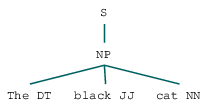

In [ ]:
# printing the tree object
parsed_output

Ex.2:

In this example, there are two noun phrase in the sentence "The black cat jumped over the metal fence."

Whitout the chunking, the result would be a flatten structure:
 - DT(The) + JJ(black) + NN(cat) + VBD(jumped)  + IN(over) + DT(the) + JJ(metal) + NN(fence)

The chunk parser returns as output a tree with the following structure:
 - NP(The black cat) + VBD(jumped)  + IN(over) + NP(the metal fence)
 

In [ ]:
text_tb_2

TextBlob("The black cat jumped over the metal fence.")

In [ ]:
reg_exp = "NP: {<DT>?<JJ>*<NN>}"
rp = nltk.RegexpParser(reg_exp)
parsed_output = rp.parse(text_tb_2.tags)
print(parsed_output)

(S
  (NP The/DT black/JJ cat/NN)
  jumped/VBD
  over/IN
  (NP the/DT metal/JJ fence/NN))


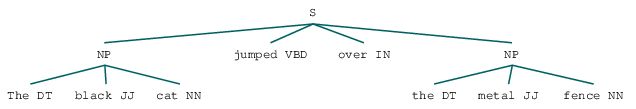

In [ ]:
# Printing the tree
parsed_output

Ex.3: 

In this example, this new text has more than one adjective ("cute" in this case). It shows that one or more adjectives can be identified and added up to the chunk.

In [ ]:
text = "The cute black cat jumped very high"
reg_exp = "NP: {<DT>?<JJ>*<NN>}"
rp = nltk.RegexpParser(reg_exp)
text_tb_3 = TextBlob(text)
parsed_output = rp.parse(text_tb_3.tags)
print(parsed_output)

(S (NP The/DT cute/JJ black/JJ cat/NN) jumped/VBD very/RB high/JJ)


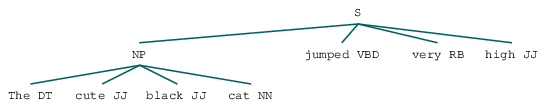

In [ ]:
parsed_output

Ex 4:

Now, it is important to have in mind that the parser takes into consideration the context the word is in. 

Sometimes, it can produce weird results. For example, in the sentence "The cute cat" the word "cute" is and adjective and it was classified as a noun. 

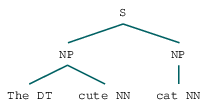

In [ ]:
text = "The cute cat"
reg_exp = "NP: {<DT>?<JJ>*<NN>}"
rp = nltk.RegexpParser(reg_exp)
text_tb = TextBlob(text)
parsed_output = rp.parse(text_tb.tags)
parsed_output

Ex. 5: 

In the next cell, we can see that, to form the chunk, the absence of an adjective does not affect the result. 

Although there are no adjectives for the words 'cat' and 'fence', the parser is still able to return the chunks.

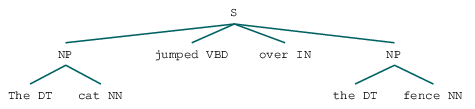

In [ ]:
text = "The cat jumped over the fence."
reg_exp = "NP: {<DT>?<JJ>*<NN>}"
rp = nltk.RegexpParser(reg_exp)
text_tb = TextBlob(text)
parsed_output = rp.parse(text_tb.tags)
parsed_output

Ex 6:

Using ".*" makes the parser chunk everything together.

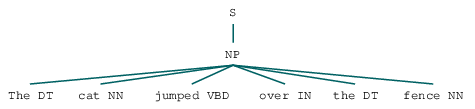

In [ ]:
text = "The cat jumped over the fence."
grammar = r"NP: {<.*>+} # Chunk everything"
rp = nltk.RegexpParser(grammar)
text_tb_3 = TextBlob(text)
parsed_output = rp.parse(text_tb_3.tags)
parsed_output

Ex 7:

In the next example, the parser 


## 2.3. Chinking

Chunking is a processes where we determine what we want to chunk. However, sometimes we want that the chunk comes without some elements.

It is possible to add more rules to the chunk parser to extract what you want, but, sometimes saying what we don't want is more practical and faster.

Chinking is a process to remove the words we do not want in the chunk. 

In chinking, we pass to the chunk grammar the chinks to be removed from the chunk inside the }{ symbol.

Ex. 1:

In the next example we chunk chunk everything and chink any sequence of a verb
or (given by the '|' symbol) a preposition.

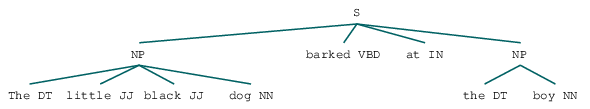

In [ ]:
my_string = "The little black dog barked at the boy."
output = TextBlob(my_string)
reg_exp = r""" NP:
{<.*>+}         
}<VBD|IN>+{
"""
rp = nltk.RegexpParser(reg_exp)
parsed_output = rp.parse(output.tags)
parsed_output

In the next examples we will use parts of the following text assigned to the'my_string' variable.

"There are three kinds of recount text. They are about personal experiences, biographies, and historical events.  The social function recount text is to show what happened. It is to retell events for the purpose of informing and entertaining readers. Because of retelling the past events, language features of recount text is mostly written in past tenses which cover simple past tense, past continuous tense, and past perfect tense."

In [ ]:
my_string = "There are three kinds of recount text. They are about personal experiences, biographies, and historical events.  The social function recount text is to show what happened. It is to retell events for the purpose of informing and entertaining readers. Because of retelling the past events, language features of recount text is mostly written in past tenses which cover simple past tense, past continuous tense, and past perfect tense"

Ex 1:

Chunk everything and Chink (remove) any verb (VB).

There are three kinds of recount text. They are ab


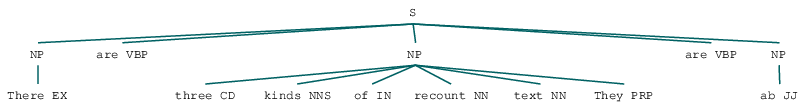

In [ ]:
output = TextBlob(my_string[:50])
print(output)
reg_exp = r""" NP:
{<.*>+}         
}<VB.?>{     
"""
rp = nltk.RegexpParser(reg_exp)
parsed_output = rp.parse(output.tags)
parsed_output

Ex 2:

Chunk everything and Chink (remove) any verb (VB) or a determiner(DT).

raphies, and historical events.  The social function recount text is t


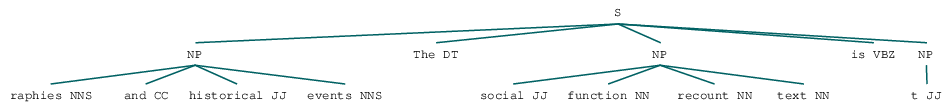

In [ ]:
output = TextBlob(my_string[80:150])
print(output)
reg_exp = r""" NP:
{<.*>+}         
}<VB.?|DT>{     
"""
rp = nltk.RegexpParser(reg_exp)
parsed_output = rp.parse(output.tags)
parsed_output

Ex 3:

Chunk everything and Chink (remove) any verb (VB) or a adjective (JJ).

raphies, and historical events.  The social function recount text is t


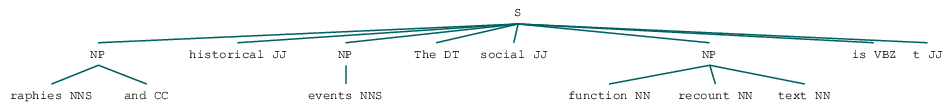

In [ ]:
output = TextBlob(my_string[80:150])
print(output)
reg_exp = r""" NP:
{<.*>+}         
}<VB.?|DT|JJ>{     
"""
rp = nltk.RegexpParser(reg_exp)
parsed_output = rp.parse(output.tags)
parsed_output

Ex 4:

Chunk everything and Chink (remove) any verb (VB), or a determiner (DT), or a adjective (JJ), or a conjunction (CC).

o show what happened. It is to retell events for t


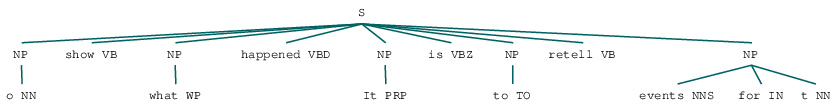

In [ ]:
output = TextBlob(my_string[150:200])
print(output)
reg_exp = r""" NP:
{<.*>+}         
}<VB.?|DT|JJ|CC>{     
"""
rp = nltk.RegexpParser(reg_exp)
parsed_output = rp.parse(output.tags)
parsed_output

Ex 5:

Chunk everything and Chink (remove) a determiner (DT), any pronoun (PRP) and a conjunction (CC).

o show what happened. It is to retell events for t


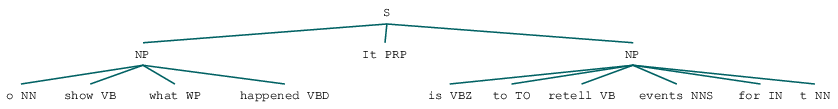

In [ ]:
output = TextBlob(my_string[150:200])
print(output)
reg_exp = r""" NP:
{<.*>+}         
}<DT|PRP.?|CC>{     
"""
rp = nltk.RegexpParser(reg_exp)
parsed_output = rp.parse(output.tags)
parsed_output

Ex 6:

Chunk everything and Chink (remove) a preposition (IN), or any pronoun (PRP), or a conjunction (CC) or to (TO).

o show what happened. It is to retell events for t


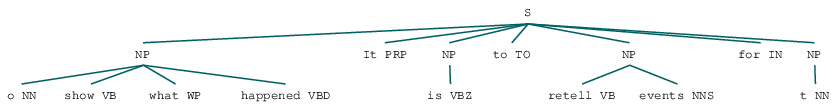

In [ ]:
output = TextBlob(my_string[150:200])
print(output)
reg_exp = r""" NP:
{<.*>+}         
}<IN|PRP.?|CC|TO>{     
"""
rp = nltk.RegexpParser(reg_exp)
parsed_output = rp.parse(output.tags)
parsed_output

As we can see, chunking and chinking offers different options to retrieve the information needed. 

# 3. Hierarchy of concepts in NLP

Natural Language Processing makes computers understand natural language to perform, with high accuracy, a variety of time-consuming tasks faster than humans. 

It is relevant to understand the hierarchy of concepts in NLP to create models capable of performing the tasks mentioned earlier. Thus, the following sections describe each element concept the NLP hierarchy structure encompasses.

## 3.1. Corpora and Corpus 

**Corpus** means 'body' in Latin. In Natural Language Processing, Corpus relates to a collection of texts or speech transcriptions that contain one or more languages[3] and are constructed with a specific purpose[4]. For example, a report, an essay, or a history book are different Corpus. On the other hand, **Corpora**, sometimes called 'corpuses', is the plural of Corpus.

NLTK library contains many text corpora that can be leveraged in NLP pipelines. For example, Gutenberg Corpus is a selection of texts from the Project Gutenberg electronic text archive, which contains around 25,000 free electronic books hosted at http://www.gutenberg.org/ [5]. This NLTK corpus has 18 texts and can be viewed in python as follows:

In [ ]:
# Importint Gutenberg Corpus
from nltk.corpus import gutenberg

print('Number of texts in Gutenberg Corpus: ', len(gutenberg.fileids()))
print('')
print('Files titles in Gutenberg Corpus: \n')
for text in gutenberg.fileids():
    print(text)

Number of texts in Gutenberg Corpus:  18

Files titles in Gutenberg Corpus: 

austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt


The fisrt column in the table below [5] shows all avaiable English corpus within NLTK library. They contain many features to help in NLP like linguistic annotations, part-of-speech tags, etc.

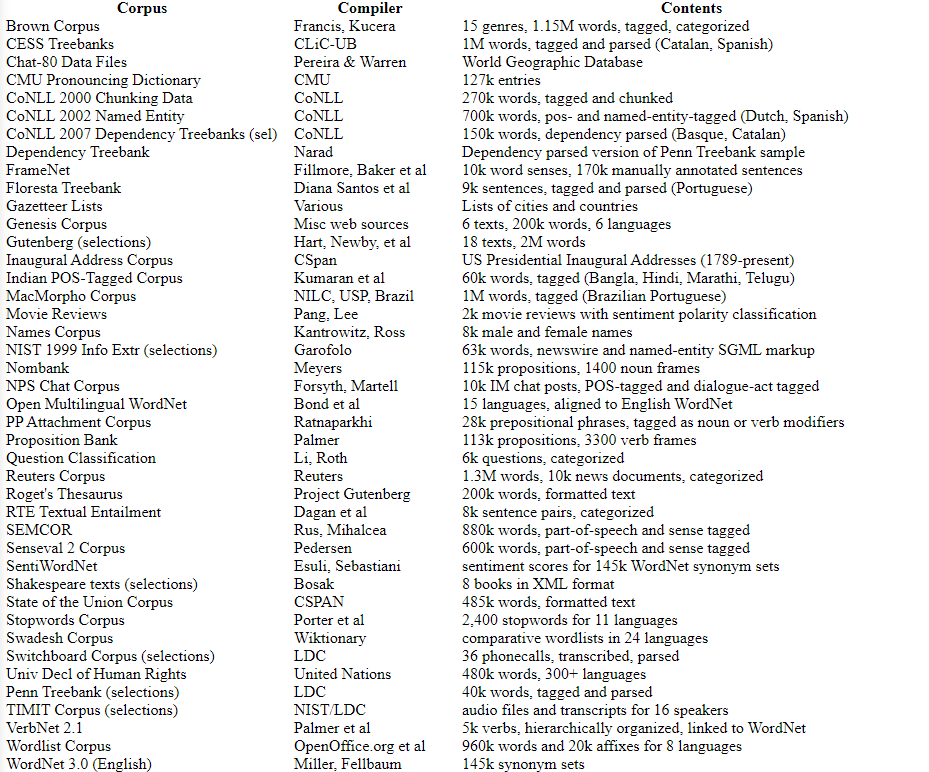



## 3.2. Text

A corpus is a collection of **texts**; the text is a collection of sentences; a sentence is a collection of clauses; clause is a collection of phrases; the phrase is a collection of words. Each word is semantically joined according to language rules.

## 3.3. Token and Vector

In Natural Language Processing, converting text into numbers is necessary as computers understand nothing but numbers. In that process, sentences are split into small pieces called tokens. Thus, each word in a sentence is considered a token. Here is an example of the process of converting text into vectors. Imagine the following sentences:

- Sentence 1: I love to play soccer
- Sentence 2: I love to dance
- Sentence 3: he would like to play the guitar

Each sentence is converted into a vector where the tokens (words) are assigned as columns (often called features or dimensions) in the vector. All that is needed is to sum up their occurrences and register the values in their related cells. We would have the result in the table below.



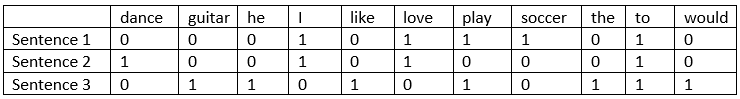

With that struture computer can ealisy calculate, for example, that sentences 1 and 2 are pretty much alike as most of their columns have similar values.

Also, given the context, each word in the vector can be labeled with POS-tagging.

## 3.4. Doc/document

When analyzing different text or collection of texts, the term document is more used. A document can be a text, a paper, a resume, or even a book, that the computer processes looking for patterns or correlations.

In a collection of documents, each document can be converted into a vector (document-vector) that in turn is assigned to a table similar to one in the previous section. This table or matrix is called document-term and the higher the number of words in all documents the higher the number of columns or dimensions. For a small example, in the table below we have document-vetors for the following documents.

 - Document 1: I love to play soccer but my brother doesn't.
 - Document 2: Did you realized how much effort we have to put to learn AI?.
 - Document 3: He has doing all the work. Now, they have to consider writing a paper
 - Document 4: Often times, we get not so good results. However, this experiment has been a successful endevour.

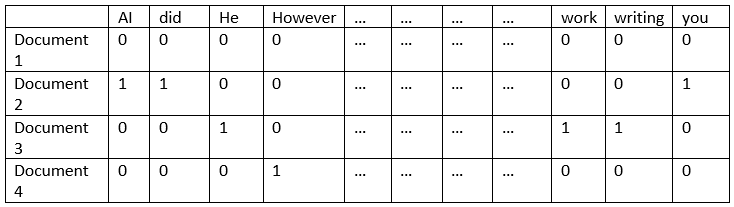

Those simple documents generated a 4x49 document-matrix. That gives us a sense of how large the dimension could be if we used books instead of simple sentences.

## 3.5. Character


Characters are the smallest piece of element in a string. For example, in "How are you, Bruce? I'm doing great, Bob!!!", each letter, comma, dot, punctiations, etc. are considered as a different character.

As computers only understand numbers, it uses a scheme to map the translation between characters and numbers. For example, ASCII, the most common scheme used, covers the Latin characters [6]. 

As computers diferentiate uppercase letters from lowercase ones, in NLP cleaning process, is common to convert all characters in a document into lowercase. Also, punctuation marks, numbers and symbols are often removed as well. 

The importance of understanging the character concept is that it can help build more accurate NLP models.

## 3.6. NLP hierarchy


In NLP, documents or texts of a corpus are splited into tokens forming a document-vector that are organized in a matrix called document-term. 

The chart below demonstrates the hierarchy in both NLP and natural language.

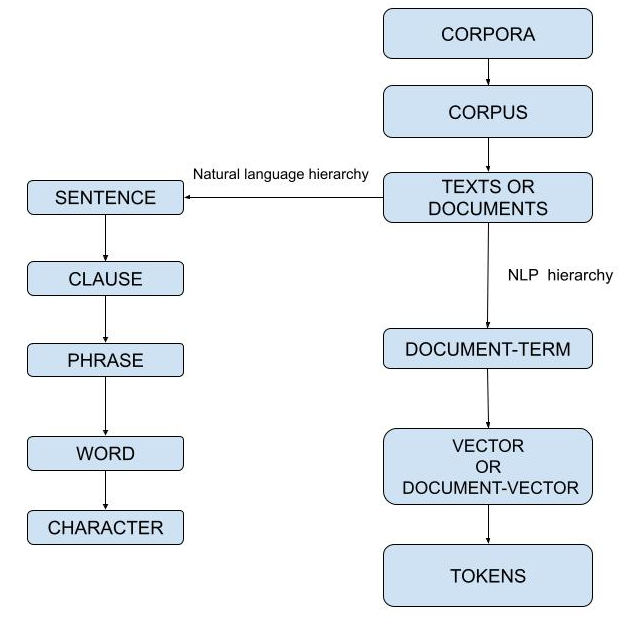

# 4 - References
[1] https://www.cis.lmu.de/~schmid/tools/TreeTagger/data/Penn-Treebank-Tagset.pdf

[2] https://www.nltk.org/book_1ed/ch07.html

[3] https://www.kdnuggets.com/2017/11/building-wikipedia-text-corpus-nlp.html

[4 ]https://nordiskateckensprak.files.wordpress.com/2014/01/knb_whatisacorpus_cph-2013_outline.pdf

[5] https://www.nltk.org/book/ch02.html

[6] https://realpython.com/python-strings/